# LSTM Strategy 

### References
https://www.datacamp.com/tutorial/lstm-python-stock-market

In [59]:
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import numpy as np

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, confusion_matrix

import yfinance as yf
from backtesting import Strategy, Backtest 
from backtesting.lib import crossover

In [6]:
#get stock data 
aapl = yf.Ticker("AAPL") #Apple Inc. 
data = aapl.history(start="2000-01-01", end="2020-01-01")

In [10]:
data.keys()

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits'], dtype='object')

In [7]:
data.index

DatetimeIndex(['2000-01-03 00:00:00-05:00', '2000-01-04 00:00:00-05:00',
               '2000-01-05 00:00:00-05:00', '2000-01-06 00:00:00-05:00',
               '2000-01-07 00:00:00-05:00', '2000-01-10 00:00:00-05:00',
               '2000-01-11 00:00:00-05:00', '2000-01-12 00:00:00-05:00',
               '2000-01-13 00:00:00-05:00', '2000-01-14 00:00:00-05:00',
               ...
               '2019-12-17 00:00:00-05:00', '2019-12-18 00:00:00-05:00',
               '2019-12-19 00:00:00-05:00', '2019-12-20 00:00:00-05:00',
               '2019-12-23 00:00:00-05:00', '2019-12-24 00:00:00-05:00',
               '2019-12-26 00:00:00-05:00', '2019-12-27 00:00:00-05:00',
               '2019-12-30 00:00:00-05:00', '2019-12-31 00:00:00-05:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=5031, freq=None)

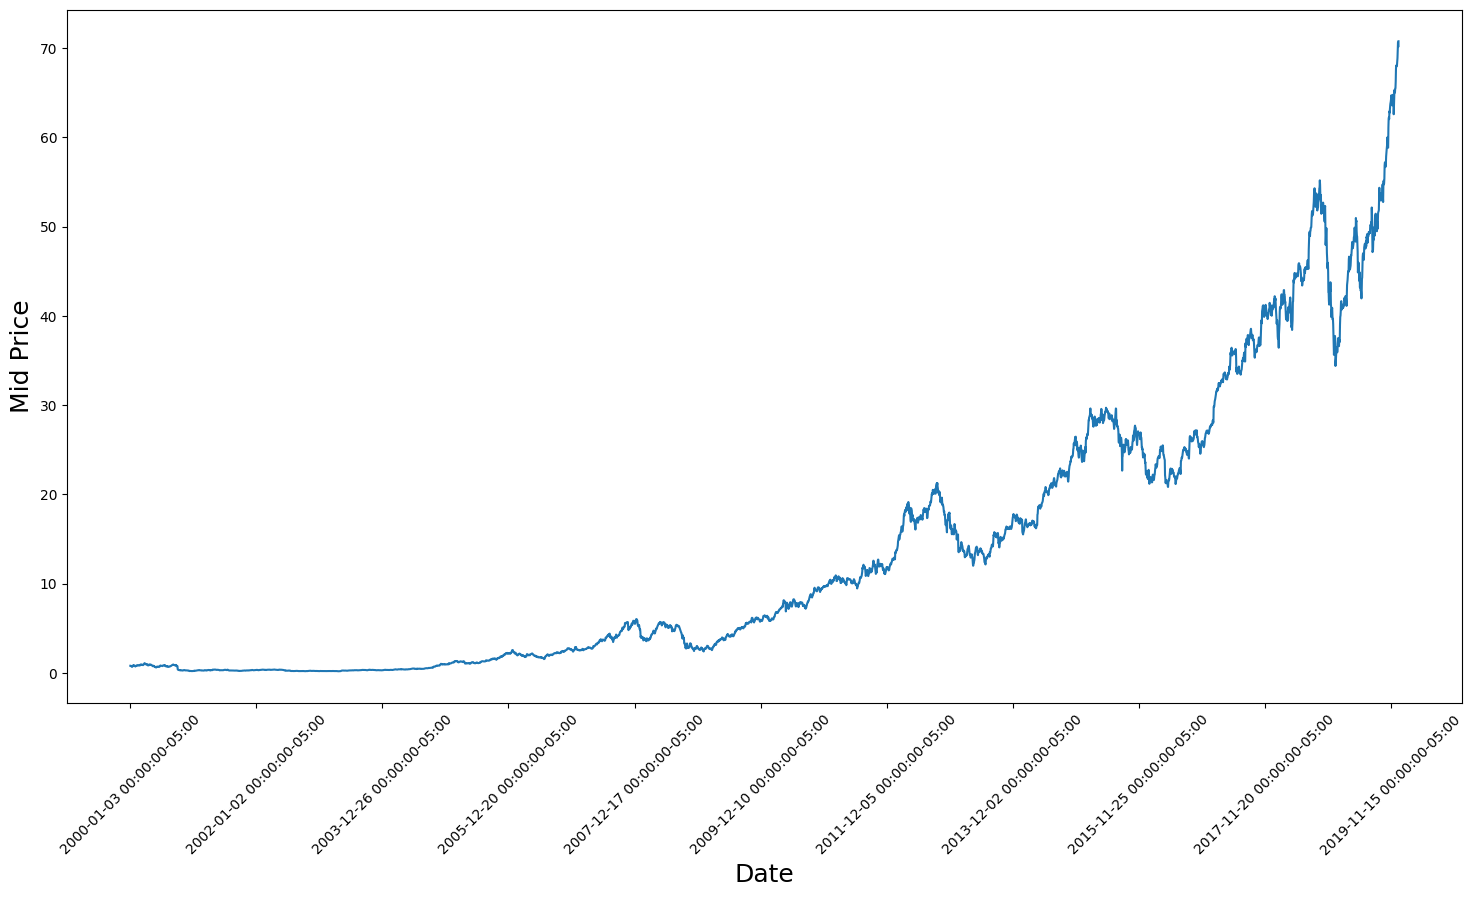

In [8]:
plt.figure(figsize = (18,9))
plt.plot(range(data.shape[0]),(data['Low']+data['High'])/2.0)
plt.xticks(range(0,data.shape[0],500),data.index[::500],rotation=45)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Mid Price',fontsize=18)
plt.show()

Model

In [12]:
# Split data into training and test sets
train_size = 0.8  # 80% training, 20% testing
train_data, test_data_bt = train_test_split(data, train_size=train_size, shuffle=False)

close_prices = train_data['Close'].values.reshape(-1, 1)

# Scale data to the range [0, 1] for LSTM model stability
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(close_prices)

#add factors to input data 




# Define the sequence length (e.g., using the past 60 days to predict the next day's price)
sequence_length = 60
X, y = [], []

for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i - sequence_length:i, 0])
    y.append(scaled_data[i, 0])

X, y = np.array(X), np.array(y)

# Reshape X for LSTM input (samples, sequence_length, features)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

In [14]:
# LSTM model
# need to tune hyperparameters and experiemnt with numbers of layers, activation function, lr 
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X, y, epochs=20, batch_size=32)


/Users/alexandramcadam/Documents/Uni/Year4/QuantProject/quantenv/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0175
Epoch 2/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0015
Epoch 3/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0013
Epoch 4/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0013
Epoch 5/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0010
Epoch 6/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0013
Epoch 7/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0011
Epoch 8/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 9.5370e-04
Epoch 9/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 9.0331e-04
Epoch 10/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 9.5594e-04
Epoch 11/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 9.2327e-04
Epoch 12/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 8.0772e-04
Epoch 13/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 8.1305e-04
Epoch 14/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 9.4696e-04
Epoch 15/20
124

In [15]:
# Split scaled data into training and test sets
train_size = int(len(scaled_data) * 0.8)
train_data, test_data = scaled_data[:train_size], scaled_data[train_size - sequence_length:]

# Prepare test sequences
X_test, y_test = [], []
for i in range(sequence_length, len(test_data)):
    X_test.append(test_data[i - sequence_length:i, 0])
    y_test.append(test_data[i, 0])

X_test, y_test = np.array(X_test), np.array(y_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Predict and inverse scale the results
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform([y_test])


26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


In [56]:
dates = test_data_bt.index
dates

DatetimeIndex(['2015-12-31 00:00:00-05:00', '2016-01-04 00:00:00-05:00',
               '2016-01-05 00:00:00-05:00', '2016-01-06 00:00:00-05:00',
               '2016-01-07 00:00:00-05:00', '2016-01-08 00:00:00-05:00',
               '2016-01-11 00:00:00-05:00', '2016-01-12 00:00:00-05:00',
               '2016-01-13 00:00:00-05:00', '2016-01-14 00:00:00-05:00',
               ...
               '2019-12-17 00:00:00-05:00', '2019-12-18 00:00:00-05:00',
               '2019-12-19 00:00:00-05:00', '2019-12-20 00:00:00-05:00',
               '2019-12-23 00:00:00-05:00', '2019-12-24 00:00:00-05:00',
               '2019-12-26 00:00:00-05:00', '2019-12-27 00:00:00-05:00',
               '2019-12-30 00:00:00-05:00', '2019-12-31 00:00:00-05:00'],
              dtype='datetime64[ns, America/New_York]', length=1007, freq=None)

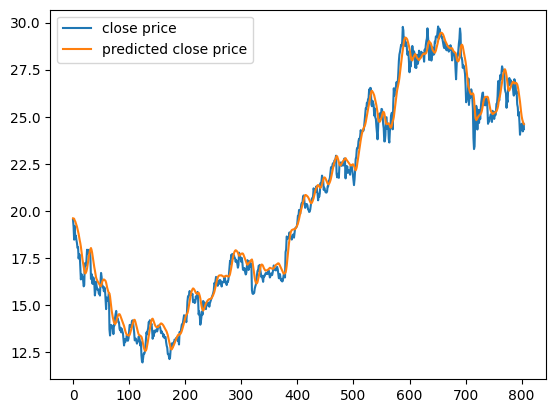

In [36]:
plt.plot(np.concatenate(y_test), label='close price')
plt.plot(predictions, label='predicted close price')
plt.legend()

In [50]:
len(predictions), len(X_test)

(805, 805)

In [70]:
np.concatenate(predictions).shape, np.concatenate(y_test).shape

((805,), (805,))

In [76]:
#model evaluation
mse = (1/len(predictions))*((np.concatenate(predictions) - np.concatenate(y_test))**2)
print(f"MSE: {mse.mean():0.2f} (+/- {mse.std():0.2f})")

MSE: 0.00 (+/- 0.00)


In [48]:
class LSTMStrategy(Strategy):
    def init(self):
        # Predict future price movements with the LSTM model
        self.predictions = predictions 
        self.index = 0
        self.threshold = 0.02  #2% threshold -> optimise 

    def next(self): #not working atm 

        if self.index < len(self.predictions):
            current_price = self.data.Close[-1] #is this correct
            predicted_price = self.predictions[self.index]
            
            # Calculate expected return as a percentage
            expected_return = (predicted_price - current_price) / current_price
            
            # Check for buy/sell signals based on threshold
            if expected_return > self.threshold:
                if not self.position.is_long:
                    self.buy()  # Open or hold a long position
            elif expected_return < -self.threshold:
                if not self.position.is_short:
                    self.sell()  # Open or hold a short position
            else:
                # Close position if the expected return is within the threshold
                if self.position:
                    self.position.close()
            
            self.index += 1
        

# Run the backtest on example data
bt = Backtest(test_data, LSTMStrategy, cash=10000, commission=.002)
stats = bt.run()
bt.plot()



/Users/alexandramcadam/Documents/Uni/Year4/QuantProject/quantenv/lib/python3.9/site-packages/backtesting/_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%d %b'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],
/Users/alexandramcadam/Documents/Uni/Year4/QuantProject/quantenv/lib/python3.9/site-packages/backtesting/_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%m/%Y'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],
/Users/alexandramcadam/Documents/Uni/Year4/QuantProject/quantenv/lib/python3.9/site-packages/backtesting/_plotting.py:455: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df2 = (df.assign(_width=1).set_index('datetime')
/Users/alexandramcadam/Documents/Uni/Year4/QuantProject/quantenv/lib/python3.9/site-packages/backtesting/_plotting.py:659: UserWarning: found multiple co

GridPlot(id='p1985', ...)

In [40]:
stats

Start                     2000-01-03 00:00...
End                       2019-12-31 00:00...
Duration                   7302 days 00:00:00
Exposure Time [%]                   99.960246
Equity Final [$]                897427.712345
Equity Peak [$]                 902349.307886
Return [%]                        8874.277123
Buy & Hold Return [%]             8341.952794
Return (Ann.) [%]                   25.263534
Volatility (Ann.) [%]               52.488908
Sharpe Ratio                         0.481312
Sortino Ratio                        0.891071
Calmar Ratio                         0.308853
Max. Drawdown [%]                  -81.797794
Avg. Drawdown [%]                   -5.328314
Max. Drawdown Duration     1771 days 00:00:00
Avg. Drawdown Duration       44 days 00:00:00
# Trades                                    1
Win Rate [%]                            100.0
Best Trade [%]                    8874.826324
Worst Trade [%]                   8874.826324
Avg. Trade [%]                    

In [58]:
class FactorStrategy(Strategy):
    
    def init(self):
        # Initialize an indicator to store predictions
        self.forecasts = self.I(lambda: np.repeat(np.nan, len(self.data)), name='forecast')

    def next(self):

        # Prepare the latest feature data for prediction
        features = self.data.df.iloc[-1:][['Momentum', 'Volatility']]
        predicted_return = model.predict(features)[0]

        # Update forecast indicator for plotting
        self.forecasts[-1] = predicted_return

        # Implement buy/sell logic based on predicted return
        if predicted_return > 0:
            self.buy(size=0.5) #calculate best size 
            
        elif predicted_return < 0:
            self.sell(size=0.5)
            

# Run the backtest on training data 
bt = Backtest(test_data, FactorStrategy, cash=10000, commission=0.002)
stats = bt.run()

print(stats)
bt.plot()

TypeError: `data` must be a pandas.DataFrame with columns